In [1]:
import pandas as pd
import os
#from fastai.vision.all import *
from fastai.tabular.all import *

C:\Users\bowan\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
Image_path = '../images_assorted'

if os.path.exists(Image_path):
    print("The file exists.")
else:
    %run ../GenerateVolumes.ipynb

The file exists.


In [3]:
df_path = '../image_data_assorted.csv'
df = pd.read_csv(df_path)

In [4]:
df.head()

,Radius,X_Position,Y_Position,Area,Surface2d,Volume,image_path,mask_path,shape
0,83,339,254,3444,283,571787,images_assorted/image_1.png,masks_assorted/mask_1.png,triange
1,67,203,421,2244,229,300763,images_assorted/image_2.png,masks_assorted/mask_2.png,triange
2,61,231,360,3721,244,226981,images_assorted/image_3.png,masks_assorted/mask_3.png,square
3,51,227,376,8167,160,555366,images_assorted/image_4.png,masks_assorted/mask_4.png,circle
4,57,347,420,3249,228,185193,images_assorted/image_5.png,masks_assorted/mask_5.png,square


In [5]:
columns = df.columns

cont_names = [col for col in columns if col != 'image_path'] # removes image_path column data
cont_names = [col for col in cont_names if col != 'mask_path'] # removes mask_path column data
cont_names = [col for col in cont_names if col != 'Radius'] # removes mask_path column data

In [12]:
cont_names = ['X_Position', 'Y_Position', 'Area', 'Surface2d', 'Volume']

cat_names = 'shape' # insert column names to use as inputs with Numerical values here
target = 'Radius'

In [13]:

# use this to check if columns are in the right list
print(cat_names)
print(cont_names)
print(df.dtypes)

shape
['X_Position', 'Y_Position', 'Area', 'Surface2d', 'Volume']
Radius         int64
X_Position     int64
Y_Position     int64
Area           int64
Surface2d      int64
Volume         int64
image_path    object
mask_path     object
shape         object
dtype: object


In [22]:
batch_size = 64      # where you declare batch size

dls = TabularDataLoaders.from_csv( 
df_path,                    # Path to the CSV file 
y_names=target,             # Name of the target column 
cat_names=cat_names,        # List of categorical data column names 
cont_names=cont_names,      # List of continuous values column names 
bs=batch_size ,           # Batch size
procs=[Categorify, FillMissing, Normalize] ,
batch_tfms=[IntToFloatTensor()]
)

In [23]:
print(cont_names)
print(df[cat_names])

['X_Position', 'Y_Position', 'Area', 'Surface2d', 'Volume']
0      triange
1      triange
2       square
3       circle
4       square
        ...   
995     square
996     square
997    triange
998     circle
999     square
Name: shape, Length: 1000, dtype: object


In [24]:
#print(df[cont_names].dtypes)  # Continuous columns
print(df[cat_names].dtypes)  # Categorical columns
df[cat_names] = df[cat_names].astype(str)

object


In [25]:
dls.show_batch()

,shape,X_Position,Y_Position,Area,Surface2d,Volume,Radius
0,circle,342.000000,276.000000,21113.000486,257.000001,2.308394e+06,82.0
1,square,287.000000,134.999999,10200.999979,404.000002,1.030301e+06,101.0
2,circle,234.999999,385.999995,30156.999876,307.999997,3.940457e+06,98.0
3,circle,200.000000,385.999995,8166.999997,160.000003,5.553660e+05,51.0
4,triange,131.000005,441.000005,1739.999913,201.000001,2.053790e+05,59.0
5,square,124.000002,419.999998,360.999812,76.000001,6.858970e+03,19.0
6,circle,99.000004,324.000002,5538.999978,132.000000,3.101820e+05,42.0
7,square,86.999994,125.999994,4623.999921,272.000001,3.144320e+05,68.0
8,square,96.000005,282.999999,12320.999879,443.999995,1.367631e+06,111.0
9,square,92.000002,382.000003,6399.999941,320.000000,5.120000e+05,80.0


In [26]:

#learn = tabular_learner(dls, layers=[200, 200 ,200], metrics=rmse)
learn = tabular_learner(dls, metrics=rmse)

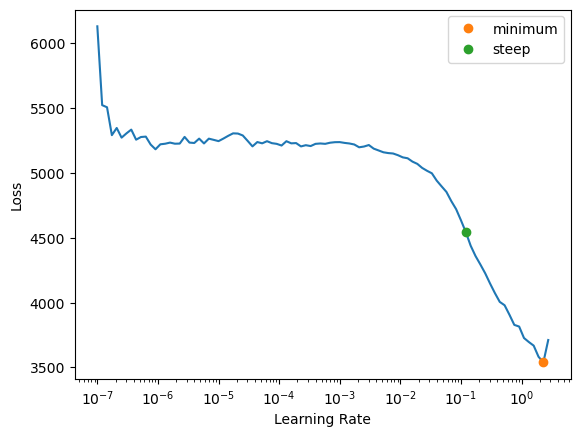

In [27]:
lr_min,lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))

In [28]:

learn.fit_one_cycle(200,lr_max=lr_steep)

epoch,train_loss,valid_loss,_rmse,time
0,4920.635742,4122.677734,64.208084,00:00
1,4725.457031,4031.780029,63.496300,00:00
2,4491.032715,4031.803955,63.496487,00:00
3,4194.187500,3800.823242,61.650818,00:00
4,3880.872070,3307.380371,57.509830,00:00
5,3522.710693,2514.272705,50.142525,00:00
6,3059.454346,985.633911,31.394808,00:00
7,2485.729492,319.568176,17.876471,00:00
8,1915.425293,12.029768,3.468396,00:00
9,1490.940186,138.923828,11.786595,00:00


<bound method Recorder.plot_loss of Recorder>


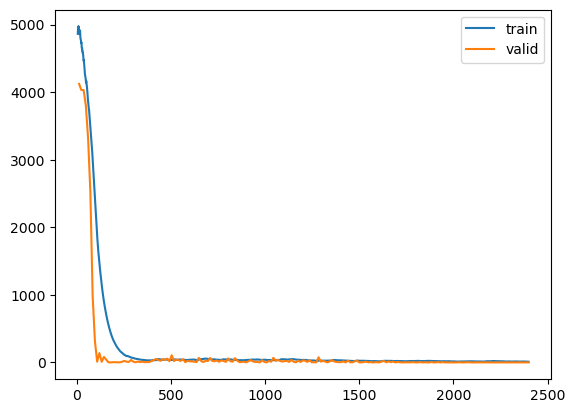

In [29]:
# Plot the losses
learn.recorder.plot_loss()
print(learn.recorder.plot_loss)
# Set the y-axis limits (replace with your desired limits)
#plt.ylim(0, 5)  # sets y-axis limits 
# Show the plot with updated y-limits
plt.show()

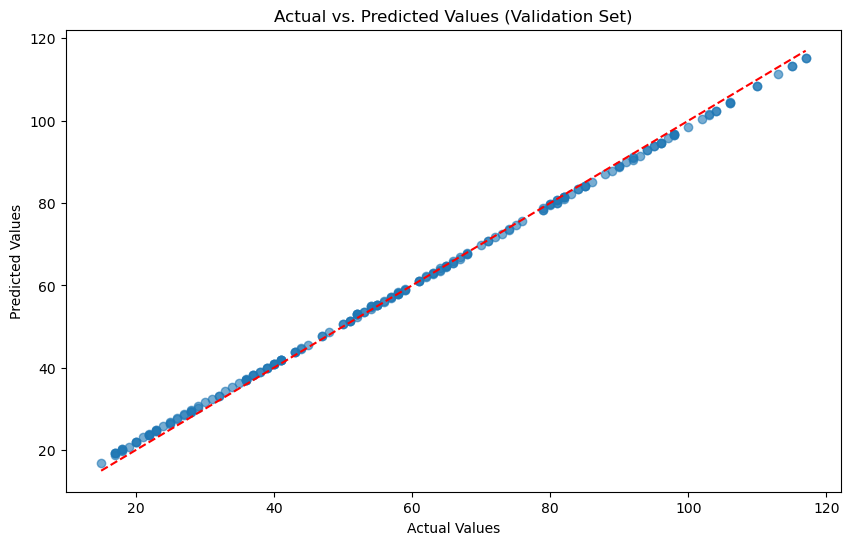

In [30]:

# extract predictions vs target value for the validatin dataset
preds, targets = learn.get_preds(ds_idx=1)  # ds_idx=1 for the validation set


import matplotlib.pyplot as plt

# Convert tensors to numpy arrays if necessary
actual_values = targets.numpy()
predicted_values = preds.numpy()

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(actual_values, predicted_values, alpha=0.6)
plt.plot([actual_values.min(), actual_values.max()], [actual_values.min(), actual_values.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Validation Set)')
plt.show()

In [31]:


learn.export('exported_classification_tabular_model.pkl')
 


In [32]:
# import

learn2 = load_learner('exported_classification_tabular_model.pkl')   # using learner2 to show its loading

In [34]:

# Get the nth row (e.g., 2nd row)
n = 1  # Remember, indexing starts at 0
orginalrow = df.iloc[n]
print(f'GroundTurth value {orginalrow["Radius"]}')
                 
df_selected = df[cont_names+[cat_names]] # if just a string 
#df_selected = df[cont_names+[cat_names]] # if cat_names is a list
nth_row = df_selected.iloc[n]

DataSeries_with_appended_prediction, PredictionValue1, PredictionValue2 =learn2.predict(nth_row)

print(DataSeries_with_appended_prediction)
print(PredictionValue1)
print(PredictionValue2)

GroundTurth value 67


   shape  X_Position  Y_Position      Area  Surface2d    Volume     Radius
0    3.0   -0.487727    1.520095 -0.626871  -0.046216 -0.480571  66.860664
tensor([66.8607])
tensor([66.8607])
